## The Levenshtein Distance

- The distance value describes the minimal number of deletions, insertions, or substitutions that are required to transform one string (the source) into another (the target)
- Time complexity is O(m*n) where m and n is number of char
- There are multiple libraries implemnets this algo, for ex: textdistance , strsim , fuzzywuzzy
- **py-stringmatching** is another good c++ based library having very large number of algo implementation
- We will use fuzzywuzzy which has two version , pure python implementation (fuzzywuzzy) and one with c++ (fuzzywuzzy[speedup]) [ it uses python-Levenshtein  library internally]
- for windows machine i am getting this error while installing (fuzzywuzzy[speedup])
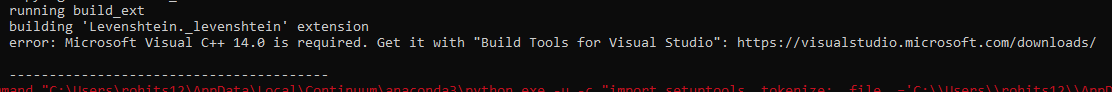

In [1]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

C:\Users\rohits12\AppData\Local\Continuum\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# let try to check it on provider name 

claim_string = "IHC BEAVER DAM EMERG PHYS LLC"
prov_str_1 = "IHC-BEAVER DAM EMERGENCY PHYSICIANS, LLC(HBP)"
prov_str_2 = "IHC BEAVER DAM EMERGENCY PHYSICIANS"

In [5]:
# ratio will calculate only Levenshtein Distance
fuzz.ratio(claim_string,prov_str_1),fuzz.ratio(claim_string,prov_str_2)

(76, 81)

In [13]:
# sometimes its better to use WRatio 
# instead of simple ratio as WRatio handles lower and upper cases and some other parameters too

fuzz.WRatio(claim_string,prov_str_1),fuzz.ratio(claim_string,prov_str_2)

(86, 81)

In [6]:
# partial_ratio will check if substring matches or not
# The way this works is by using an "optimal partial" logic. In other words, if the short string has length k and the 
# longer string has the length m, then the algorithm seeks the score of the best matching length-k substring.
fuzz.partial_ratio(claim_string,prov_str_1),fuzz.ratio(claim_string,prov_str_2)

(83, 81)

In [7]:
# token_sort_ratio is useful when string is same but order changes ex: Rohit Shah vs Shah Rohit
# They tokenize the strings and preprocess them by turning them to lower case and getting rid of punctuation
# In the case of fuzz.token_sort_ratio(), the string tokens get sorted alphabetically and then joined together. 
fuzz.token_sort_ratio(claim_string,prov_str_1),fuzz.ratio(claim_string,prov_str_2)

(81, 81)

In [9]:
# what if two strings are widely different length ex: shah rohit vs Rohit Ashok shah
# or "The supreme court case of Nixon vs The United States" & "Nixon v. United States"
# Instead of just tokenizing the strings, sorting and then pasting the tokens back together, token_set_ratio performs a 
# set operation that takes out the common tokens (the intersection) and then makes fuzz.ratio() pairwise 
# comparisons between the following new strings

# s1 = Sorted_tokens_in_intersection
# s2 = Sorted_tokens_in_intersection + sorted_rest_of_str1_tokens
# s3 = Sorted_tokens_in_intersection + sorted_rest_of_str2_tokens

fuzz.token_set_ratio(claim_string,prov_str_1),fuzz.ratio(claim_string,prov_str_2)

(81, 81)

In [10]:
# fuzzywuzzy package has a module called process that allows you to calculate the 
# string with the highest similarity out of a vector of strings
# by default for similarity Wratio is used
process.extract(claim_string,[prov_str_1,prov_str_2])

[('IHC-BEAVER DAM EMERGENCY PHYSICIANS, LLC(HBP)', 86),
 ('IHC BEAVER DAM EMERGENCY PHYSICIANS', 81)]

## probablepeople

- probablepeople is a python library for parsing unstructured romanized name or company strings into components, using conditional random fields.

In [15]:
import probablepeople

In [17]:
probablepeople.parse(claim_string), probablepeople.parse(prov_str_1),probablepeople.parse(prov_str_2)

([('IHC', 'CorporationName'),
  ('BEAVER', 'CorporationName'),
  ('DAM', 'CorporationName'),
  ('EMERG', 'CorporationName'),
  ('PHYS', 'CorporationName'),
  ('LLC', 'CorporationLegalType')],
 [('IHC-BEAVER', 'CorporationName'),
  ('DAM', 'CorporationName'),
  ('EMERGENCY', 'CorporationName'),
  ('PHYSICIANS,', 'CorporationName'),
  ('LLC', 'CorporationLegalType'),
  ('(HBP)', 'CorporationLegalType')],
 [('IHC', 'CorporationName'),
  ('BEAVER', 'CorporationName'),
  ('DAM', 'CorporationName'),
  ('EMERGENCY', 'CorporationName'),
  ('PHYSICIANS', 'CorporationName')])

In [21]:
# how does this perform on names 
probablepeople.parse("MD RUSSELL D DUMIRE "), probablepeople.parse("RUSSELL D DUMIRE MD")

([('MD', 'SuffixOther'),
  ('RUSSELL', 'GivenName'),
  ('D', 'MiddleInitial'),
  ('DUMIRE', 'Surname')],
 [('RUSSELL', 'GivenName'),
  ('D', 'MiddleInitial'),
  ('DUMIRE', 'Surname'),
  ('MD', 'SuffixOther')])

In [28]:
probablepeople.parse("BS CHIROPRACTIC")

[('BS', 'CorporationName'), ('CHIROPRACTIC', 'CorporationName')]

## geocoder 
- Google library to calculate longitude and latitude which can be used to compare address
- **its paid service** 

In [30]:
# import geocoder
# address = "PO BOX 392545 PA 15251 PITTSBURGH"
# g = geocoder.google(address)

## usaddress 
- This library can be used to normalize address (part of pre-processing)
- most widely used and also integrated with Pandas (pandas-usaddress)
- Parse US addresses using conditional random fields

In [31]:
import usaddress
address = "PO BOX 392545 PA 15251 PITTSBURGH"
usaddress.parse(address)

[('PO', 'USPSBoxType'),
 ('BOX', 'USPSBoxType'),
 ('392545', 'USPSBoxID'),
 ('PA', 'StateName'),
 ('15251', 'ZipCode'),
 ('PITTSBURGH', 'CountryName')]

In [32]:
address = "PO BOX 80233 PA 12180 PHILADELPHIA"
usaddress.parse(address)

[('PO', 'USPSBoxType'),
 ('BOX', 'USPSBoxType'),
 ('80233', 'USPSBoxID'),
 ('PA', 'StateName'),
 ('12180', 'ZipCode'),
 ('PHILADELPHIA', 'CountryName')]

In [33]:
address = "P O BOX 80233 PA 12180 PHILADELPHIA"
usaddress.parse(address)

[('P', 'USPSBoxType'),
 ('O', 'USPSBoxType'),
 ('BOX', 'USPSBoxType'),
 ('80233', 'USPSBoxID'),
 ('PA', 'StateName'),
 ('12180', 'ZipCode'),
 ('PHILADELPHIA', 'CountryName')]

## Length of string 

- length of string could be important feature 
- length must be calculated after removing spacial char & spaces 
- more pre-processing steps can be added like removing CorporationLegalType after normalization and than comparing apple to apple

In [37]:
import re
regular_exp = '[^A-Za-z0-9]+'
len(re.sub(regular_exp,'',claim_string)),len(re.sub(regular_exp,'',prov_str_1)),len(re.sub(regular_exp,'',prov_str_2))

(24, 37, 31)

## nameparser 
- Python module for parsing human names into their individual components
- **I dont think this will be useful** 

In [38]:
from nameparser import HumanName
HumanName("N AMBROSINO")

<HumanName : [
	title: '' 
	first: 'N' 
	middle: '' 
	last: 'AMBROSINO' 
	suffix: ''
	nickname: ''
]>

In [45]:
HumanName("DR. TATIANA HERNANDEZ TAMPA")

<HumanName : [
	title: 'DR.' 
	first: 'TATIANA' 
	middle: 'HERNANDEZ' 
	last: 'TAMPA' 
	suffix: ''
	nickname: ''
]>

## phonetics

- To deal with different spellings that occur due to different pronunciations, we use the concept of phonetic hashing which will help you canonicalise different versions of the same word to a base word.
- Fuzzy is python based library. It uses C Extensions (via Cython) for speed.
- jellyfish is python based library
- There are multiple algorithms for generating phonetic codes
    - Soundex
    - NYSISS
    - Metaphone
    - Double Metaphone

In [82]:
import jellyfish
from metaphone import doublemetaphone
jellyfish.soundex(u'Mississippi')

'M221'

How it works
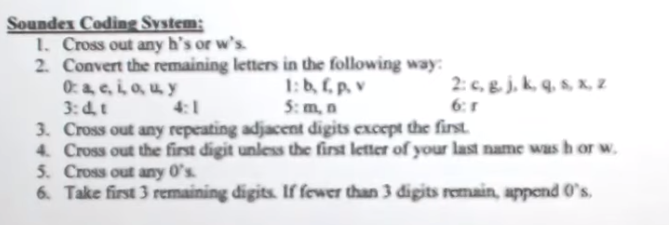

Limitation of soundex code
- its good for small string but inefficent for long strings
- **But with the names Soundex works the best** compare to other phonetic based algo

In [84]:
name1= "Bojana"
name2 = "Boyana"

print(jellyfish.soundex(name1), jellyfish.soundex(name2))
print(jellyfish.metaphone(name1),jellyfish.metaphone(name2))
print(jellyfish.nysiis(name1),jellyfish.nysiis(name2))
print(jellyfish.match_rating_codex(name1),jellyfish.match_rating_codex(name2))
print(doublemetaphone(name1),doublemetaphone(name2))

B250 B500
BJN BYN
BAJAN BAYAN
BJN BYN
('PJN', 'PHN') ('PN', '')


In [85]:
name1= "Yunguo"
name2 = "Yungo"

print(jellyfish.soundex(name1), jellyfish.soundex(name2))
print(jellyfish.metaphone(name1),jellyfish.metaphone(name2))
print(jellyfish.nysiis(name1),jellyfish.nysiis(name2))
print(jellyfish.match_rating_codex(name1),jellyfish.match_rating_codex(name2))
print(doublemetaphone(name1),doublemetaphone(name2))

Y520 Y520
YNK YNK
YANG YANG
YNG YNG
('ANK', '') ('ANK', '')


In [86]:
name1= "Sean"
name2 = "shawn"

print(jellyfish.soundex(name1), jellyfish.soundex(name2))
print(jellyfish.metaphone(name1),jellyfish.metaphone(name2))
print(jellyfish.nysiis(name1),jellyfish.nysiis(name2))
print(jellyfish.match_rating_codex(name1),jellyfish.match_rating_codex(name2))
print(doublemetaphone(name1),doublemetaphone(name2))

S500 S500
SN XN
SAN SAN
SN SHWN
('SN', '') ('XN', '')


In [87]:
# With addresses
address1 = "PO BOX 80233 PA 12180 PHILADELPHIA"
address2 = "PO BOX 392545 PA 15251 PHILADELPHIA"
print(jellyfish.soundex(address1), jellyfish.soundex(address2))

P121 P121


In [89]:
print(jellyfish.soundex(claim_string), jellyfish.soundex(prov_str_1))
print(jellyfish.soundex(claim_string), jellyfish.soundex(prov_str_2))

I211 I211
I211 I211


In [90]:
# Other text similarity Algo

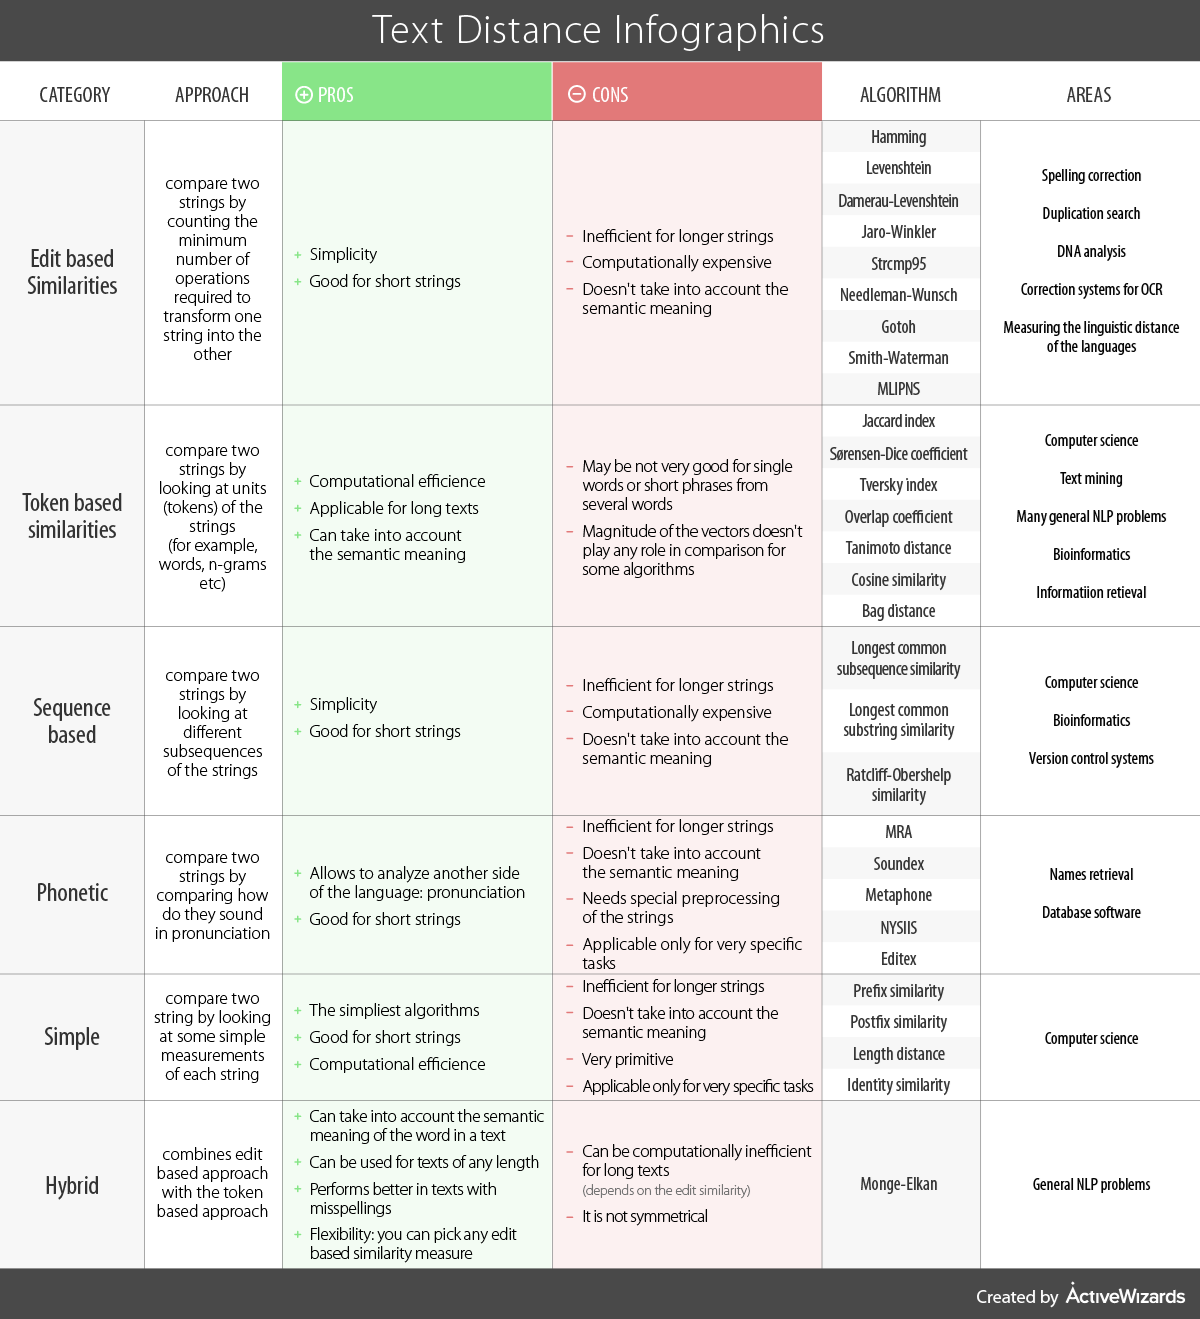